<a href="https://colab.research.google.com/github/RedeemerNtumy/JCPennyConsultancyProject/blob/master/3549063_BD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University of Stirling

# ITNPBD2 Representing and Manipulating Data

# Assignment Autumn 2025

# A Consultancy Job for JC Penney



### Introduction
The first step to take is to actually explore the dataset, find the useful information and then think of the great insights we can get for JCPenney


In [21]:
#Importing the necessary packages needed for data exploration and manipulation
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

Now that the packages are installed, I can now move ahead and read the necessary files

In [22]:
# Starting with the products dataset
products = pd.read_csv("products.csv")
products_json = pd.read_json("jcpenney_products.json", lines= True)

In [23]:
# reviews = pd.read_csv("reviews.csv")
# users = pd.read_csv("users.csv")

Now that the respective data has been loaded, I can now explore it a bit. I will start off by exploring the products dataset to see what useful information I can get from here


## Products

In [24]:
# View structure without loading whole data
products.head()

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.500
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.125


In [25]:
# Checking the dimension of the dataset
products.shape

(7982, 6)

This dataset has 7982 rows and 6 columns

In [26]:
# Getting a summarised description of the data
products.describe()

,Price,Av_Score
count,5816.000000,7982.000000
mean,144.776618,2.988683
std,499.223719,0.911673
min,-65.270000,1.000000
25%,40.700000,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


The dataset has some interesting features like the Name of the product, the price, and the SKU. I would have to view the rest of the data in order to understand how best I can utilize the dataset.

However It's quite surprising to find a negative price. I would have to check the data a bit more to find out if there are more occurences of this.

### Negative value in product price

In [27]:
#Checking the number of affected rows
len(products[products["Price"]<0])

44

There are 44 rows that have a negative price. I would correct this by finding the absolute values of the negative entries in the table

In [28]:
products["Price"] = abs(products["Price"])
products.describe() # Verifying that negative prices are removed

,Price,Av_Score
count,5816.000000,7982.000000
mean,145.424555,2.988683
std,499.035327,0.911673
min,8.010000,1.000000
25%,41.042500,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


In [29]:
# Checking for null values
products.isna().sum()

,0
Uniq_id,0
SKU,67
Name,0
Description,543
Price,2166
Av_Score,0


In [30]:
# Filling all null SKU values with "MISSING_SKU"
products["SKU"] = products["SKU"].fillna("MISSING_SKU")

In [31]:
# Get the counts for the top 10 SKUs
top_10_sku_counts = products['SKU'].value_counts().nlargest(10)

In [32]:
# Replace SKU with the most frequent product name for plotting, keep 'MISSING_SKU'
plot_labels = [
    "MISSING_SKU" if sku == "MISSING_SKU"
    else products[products['SKU'] == sku]['Name'].value_counts().index[0]
    for sku in top_10_sku_counts.index
]

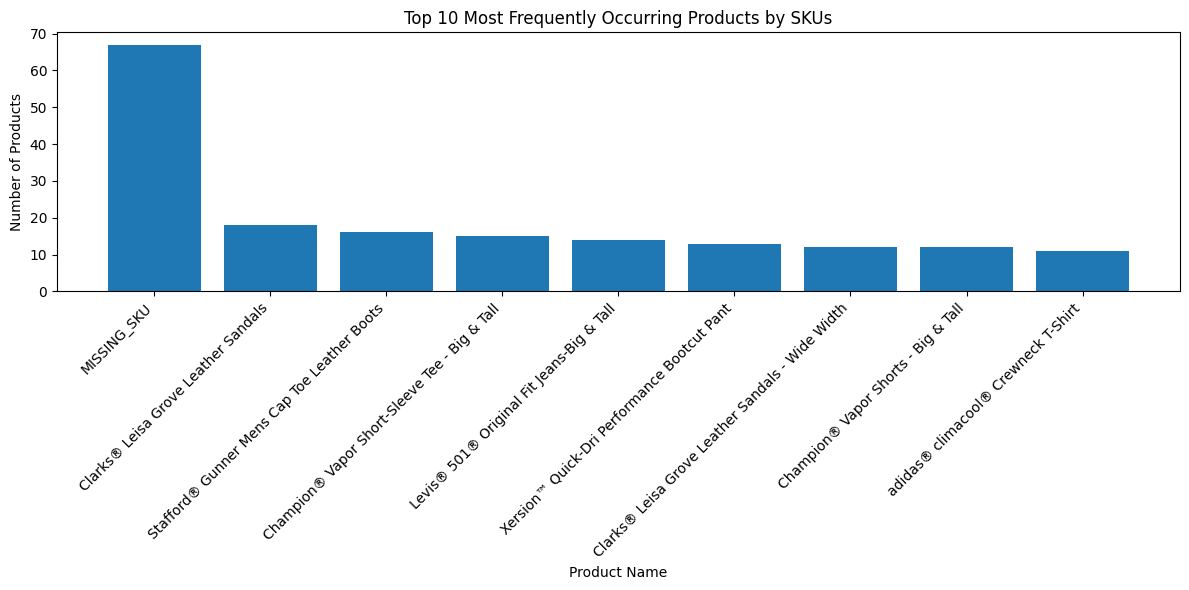

In [33]:
# Plot the distribution of the top 10 most bought SKUs with product names
plt.figure(figsize=(12, 6))
plt.bar(plot_labels, top_10_sku_counts.values)
plt.title('Top 10 Most Frequently Occurring Products by SKUs')
plt.xlabel('Product Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout(); # Adjust layout to prevent labels overlapping


The bar chart shows the top 10 most frequently bought products by SKU. The results indicate that while several individual products are among the most popular purchases, a large number of transactions are associated with missing SKU values. This means that many purchases lack proper SKU identification, which could make it difficult to track exact product performance and customer preferences accurately.

A bar chart was used because it clearly displays the relative frequency of product purchases across different SKUs. Since the goal was to identify which products were bought most often, the bar chart’s categorical layout allows for easy comparison of counts and highlights standout products at a glance.